In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
""" importing and restructuring of the nutrition_elderly dataset
'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls' """

nutri = pd.read_csv('../input/elderly/nutrition_elderly (1).csv')
dict = {1:'Single', 2 :'Couple', 3 : 'Family'} #the dictionary matches the numbers to categorical variables that they represent
nutri['situation'] = nutri['situation'].replace(dict).astype('category') #replacing the numbers with categorical in the dataset

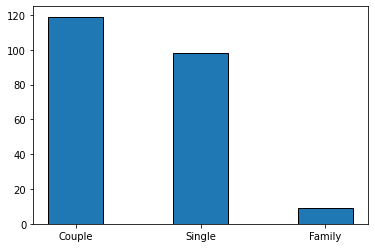

In [3]:
#plotting qualitative variables from the elderly nutrion DA
width = 0.35 #width of the bars
x = [0, 0.8, 1.6] #distance between the bars
situation_counts = nutri['situation']. value_counts()
plt.bar(x, situation_counts, width, edgecolor = 'black')
plt.xticks(x, situation_counts.index)
plt.show()



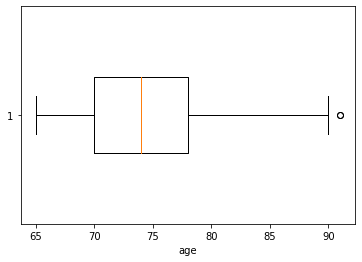

In [4]:
#plotting quatitative variables using a boxplot
#the box plot can be used to check the distribution of data in the interquatile range, outliers are marked with a 'o'
plt.boxplot(nutri['age'], widths=width, vert=False)
plt.xlabel('age')
plt.show()

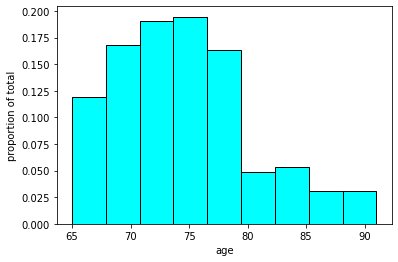

In [5]:
#histograms
weights = np.ones_like(nutri.age)/nutri.age.count() #generating the proportion of ages in the total for each bin
plt.hist(nutri.age, bins = 9, weights = weights, facecolor = 'cyan',
        edgecolor = 'black', linewidth = 1)
plt.xlabel('age')
plt.ylabel('proportion of total')
plt.show()

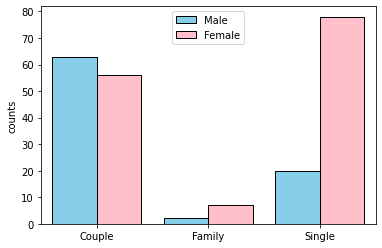

In [6]:
#plotting bivariate data using seaborn
Dict = {1:'Male', 2:'Female'}
nutri['gender'] = nutri['gender'].replace(Dict).astype('category') #restructuring the data to get categorical variables 'male' and ' female'
#actual plotting of data 
sns.countplot(x = 'situation', hue = 'gender', data = nutri,
             hue_order = ['Male', 'Female'], palette = ['skyblue', 'pink'],
             saturation = 1, edgecolor = 'black')
plt.legend(loc = 'upper center')
plt.xlabel('')
plt.ylabel('counts')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


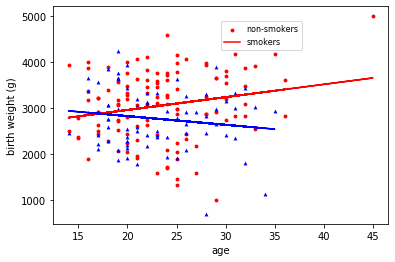

In [7]:
"""fitting a straight line through scatter plots of bivariate data
the data is the birtweight dataset 'MASS/birthwt.csv' from r datasets 'https://vincentarelbundock.github.io/Rdatasets/csv/'
the plot shows the mass of babies whose mothers and those who didn't"""
bwt = pd.read_csv('../input/r-mass-datasets/birthwt.csv')
bwt = bwt.drop('Unnamed: 0', 1) #deopping the unnamed column
styles = {0 :['o', 'red'], 1:['^', 'blue']} #
for k in styles:
    grp = bwt[bwt.smoke == k]
    m,b = np.polyfit(grp.age, grp.bwt, 1)
    plt.scatter(grp.age, grp.bwt, c= styles[k][1], s=15, linewidth = 0,
               marker = styles[k][0])
    plt.plot(grp.age, m*grp.age  + b, '-', color = styles[k][1])
plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend(['non-smokers', 'smokers'], prop = {'size': 8},
          loc = (0.5, 0.8))
plt.show()